In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
basepath = 'C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/process_data/'
df = pd.read_csv(basepath+'S01_final_df.csv')

In [3]:
# Set 'DateTime' as the index
df.set_index('DateTime', inplace=True)

# Convert index to datetime if not already
df.index = pd.to_datetime(df.index)

print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93043 entries, 2023-09-07 06:50:36 to 2023-09-29 06:55:47
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_instance        93023 non-null  object 
 1   hrv_vlf            93043 non-null  float64
 2   hrv_lf             93043 non-null  float64
 3   hrv_hf             93043 non-null  float64
 4   hrv_sdnn           93043 non-null  float64
 5   hrv_rmssd          93043 non-null  float64
 6   hrv_mean_nni       93043 non-null  float64
 7   hrv_median_nni     93043 non-null  float64
 8   hrv_range_nni      93043 non-null  float64
 9   hrv_entropy        93043 non-null  float64
 10  eda_tonic_mean     93043 non-null  float64
 11  eda_tonic_std      93043 non-null  float64
 12  eda_tonic_sum      93043 non-null  float64
 13  eda_tonic_energy   93043 non-null  float64
 14  eda_phasic_mean    93043 non-null  float64
 15  eda_phasic_std     93043 non-null  

In [4]:
df.isna().sum()

ID_instance          20
hrv_vlf               0
hrv_lf                0
hrv_hf                0
hrv_sdnn              0
hrv_rmssd             0
hrv_mean_nni          0
hrv_median_nni        0
hrv_range_nni         0
hrv_entropy           0
eda_tonic_mean        0
eda_tonic_std         0
eda_tonic_sum         0
eda_tonic_energy      0
eda_phasic_mean       0
eda_phasic_std        0
eda_phasic_sum        0
eda_phasic_energy     0
acc_acc_x_min         0
acc_acc_y_min         0
acc_acc_z_min         0
acc_l2_min            0
acc_acc_x_max         0
acc_acc_y_max         0
acc_acc_z_max         0
acc_l2_max            0
acc_acc_x_ptp         0
acc_acc_y_ptp         0
acc_acc_z_ptp         0
acc_l2_ptp            0
Temp(C)_N1            0
RH(%)_N1              0
Dewpoint(C)_N1        0
Temp(C)_N2            0
RH(%)_N2              0
Dewpoint(C)_N2        0
Temp(C)_N3            0
RH(%)_N3              0
Dewpoint(C)_N3        0
Temp(C)_N4            0
RH(%)_N4              0
Dewpoint(C)_N4  

In [5]:
df.dropna(inplace=True)

### Step 1: Filter instances with duration is within 60 minutes

In [52]:
# Calculate the duration for each instance
duration = df.groupby('ID_instance').apply(lambda x: (x.index.max() - x.index.min()).total_seconds() / 60)  # duration in minutes

duration

C:\Users\Tomar\AppData\Local\Temp\ipykernel_27556\3784306714.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duration = df.groupby('ID_instance').apply(lambda x: (x.index.max() - x.index.min()).total_seconds() / 60)  # duration in minutes


ID_instance
S01_1     36.083333
S01_10    39.733333
S01_11    34.766667
S01_12    16.816667
S01_13    22.766667
S01_14    44.916667
S01_16    35.050000
S01_17    19.700000
S01_18    28.816667
S01_19    12.000000
S01_2     46.666667
S01_20     8.066667
S01_21    24.800000
S01_3     29.050000
S01_4     27.766667
S01_5     33.550000
S01_6     52.316667
S01_8     14.250000
dtype: float64

In [37]:
# Filter out instances with durations greater than 60 minutes
keep_instances = duration[duration <= 60].index

# Filter the data
df60 = df[df['ID_instance'].isin(keep_instances)]

df60.head(), len(filtered_data)

(                    ID_instance    hrv_vlf      hrv_lf     hrv_hf   hrv_sdnn  \
 DateTime                                                                       
 2023-09-07 06:50:36       S01_1  21.621721  291.718700  82.458752  28.888495   
 2023-09-07 06:50:37       S01_1  21.611134  291.312631  82.622348  28.884024   
 2023-09-07 06:50:38       S01_1  21.600547  290.906563  82.785944  28.879554   
 2023-09-07 06:50:39       S01_1  21.589960  290.500494  82.949541  28.875084   
 2023-09-07 06:50:40       S01_1  21.579373  290.094426  83.113137  28.870613   
 
                      hrv_rmssd  hrv_mean_nni  hrv_median_nni  hrv_range_nni  \
 DateTime                                                                      
 2023-09-07 06:50:36  33.684269    707.170317      703.273339     109.325554   
 2023-09-07 06:50:37  33.692545    707.309385      703.421677     109.276108   
 2023-09-07 06:50:38  33.700820    707.448452      703.570016     109.226661   
 2023-09-07 06:50:39  33.709095

In [38]:
df60.columns

Index(['ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
       'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
       'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
       'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum',
       'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min', 'acc_acc_z_min',
       'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max', 'acc_acc_z_max',
       'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp', 'acc_acc_z_ptp',
       'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2',
       'RH(%)_N2', 'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3',
       'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4',
       'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [39]:
df60.columns[1:18]

Index(['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd', 'hrv_mean_nni',
       'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy', 'eda_tonic_mean',
       'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy', 'eda_phasic_mean',
       'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy'],
      dtype='object')

In [40]:
df60.columns[30:42]

Index(['Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2',
       'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3',
       'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4'],
      dtype='object')

### correlation matrix

### Step 2:  Correlation Analysis

In [49]:
# Selecting physiological features (excluding Subject and Commuting columns)
phy_cols = df60.columns[1:18]  # Assuming the first 20 features after Subject and Commuting are physiological
# Selecting environmental parameters
env_cols = df60.columns[30:42]  # Assuming the rest are environmental

# Calculating correlation matrix
correlation_matrix = df60[list(phy_cols) + list(env_cols)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[phy_cols, env_cols]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,-0.233747,0.258428,-0.194292,-0.218039,0.235329,-0.197996,-0.233682,0.253732,-0.196464,-0.232091,0.253751,-0.196726
hrv_lf,0.071831,-0.096152,-0.036089,0.094735,-0.119733,-0.045259,0.072087,-0.102562,-0.037671,0.071645,-0.101803,-0.038460
hrv_hf,0.202845,-0.227439,0.138564,0.201673,-0.226559,0.129667,0.203574,-0.231630,0.138104,0.199046,-0.228859,0.137119
hrv_sdnn,0.206933,-0.313669,0.010586,0.236861,-0.340306,0.000068,0.207523,-0.323408,0.008837,0.204075,-0.321009,0.007916
hrv_rmssd,0.237098,-0.412444,0.000413,0.270960,-0.438875,-0.008958,0.237530,-0.422464,-0.001180,0.234254,-0.420203,-0.001849
hrv_mean_nni,0.065640,-0.299735,0.100647,0.110265,-0.323227,0.085456,0.065811,-0.308072,0.100882,0.063543,-0.307119,0.100417
hrv_median_nni,0.058668,-0.281160,0.117332,0.104462,-0.303306,0.101797,0.058787,-0.289225,0.117707,0.056897,-0.288403,0.117388
hrv_range_nni,0.184092,-0.253260,0.065067,0.215127,-0.274230,0.057611,0.184803,-0.262753,0.063232,0.181292,-0.260680,0.062305
hrv_entropy,-0.126176,0.374879,-0.058383,-0.112202,0.355784,-0.051777,-0.126372,0.376122,-0.059181,-0.123867,0.374278,-0.059121
eda_tonic_mean,0.160797,-0.405703,0.156118,0.139859,-0.369283,0.164240,0.161241,-0.403280,0.156758,0.161119,-0.403207,0.157212


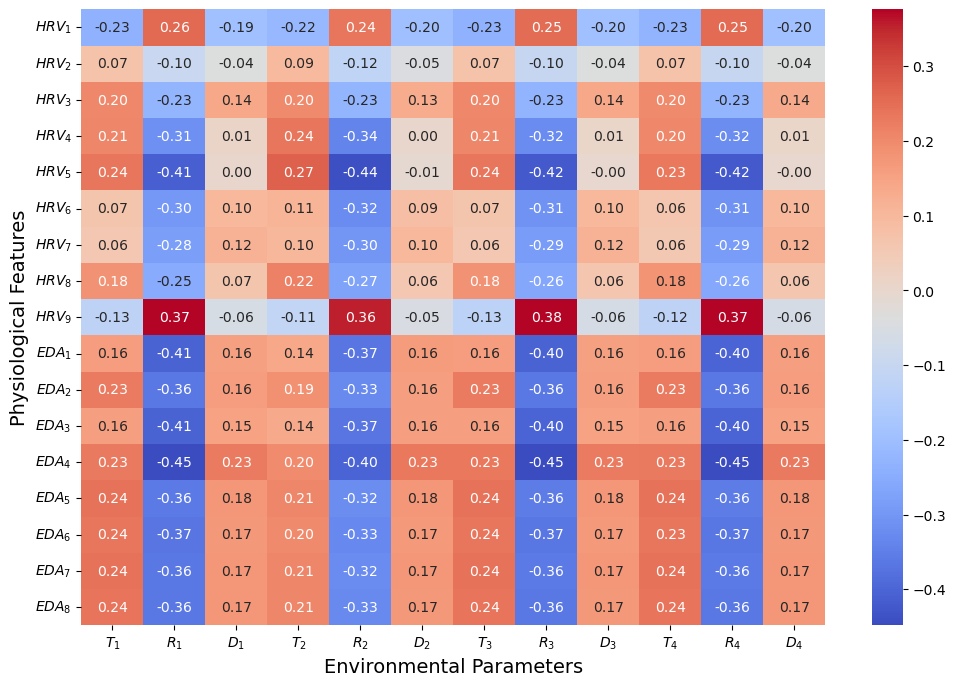

In [51]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'hrv_vlf': 'HRV$_1$', 
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',
     
    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    'Temp(C)_N1': 'T$_1$',
    'RH(%)_N1': 'R$_1$',
    'Dewpoint(C)_N1': 'D$_1$',
    'Temp(C)_N2': 'T$_2$',
    'RH(%)_N2': 'R$_2$',
    'Dewpoint(C)_N2': 'D$_2$',
    'Temp(C)_N3': 'T$_3$',
    'RH(%)_N3': 'R$_3$',
    'Dewpoint(C)_N3': 'D$_3$',
    'Temp(C)_N4': 'T$_4$',
    'RH(%)_N4': 'R$_4$',
    'Dewpoint(C)_N4': 'D$_4$'

}

# Rename columns
correlation_phys_env = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('Correlation Matrix: Physiological Features vs. Environmental Parameters')
plt.xlabel('Environmental Parameters', fontsize=14)
plt.ylabel('Physiological Features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Save the plot as .eps file
plt.savefig('correlation_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig('correlation_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()
